<a href="https://colab.research.google.com/github/Taex3/22py/blob/main/64011731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#assignment_1
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Loading the data
df1 = pd.read_csv('data1.csv', sep=';')
df2 = pd.read_csv('data2.csv', sep=';')
df3 = pd.read_csv('data3.csv', sep=';')

# Combine dataframes
df2 = df2.drop(['ID'],axis=1)
merge=pd.concat([df1,df2],axis=1)
merge2=pd.concat([merge,df3],axis=0)

#clean data
merge2['Age at enrollment'][merge2['Age at enrollment'] > 70] = 70
merge2['International'].fillna(0, inplace=True)
merge2['Tuition fees up to date'].fillna(0, inplace=True)
merge2.astype({'Tuition fees up to date': 'int64'}).dtypes
merge2["Father's qualification"] = (pd.to_numeric(merge2["Father's qualification"], errors='coerce').fillna(1))
merge2["Daytime/evening attendance"] = (pd.to_numeric(merge2["Daytime/evening attendance"], errors='coerce').fillna(0))
merge2["Target"] = merge2["Target"].replace('Drout','Dropout')
merge2["Target"] = merge2["Target"].replace('enroled','Enrolled')
merge2["Target"] = merge2["Target"].replace('Drpout','Dropout')
merge2["Target"] = merge2["Target"].replace('Grduate','Graduate')
merge2["Target"] = merge2["Target"].replace('Dropot','Dropout')

<ipython-input-59-a9dd65645615>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge2['Age at enrollment'][merge2['Age at enrollment'] > 70] = 70


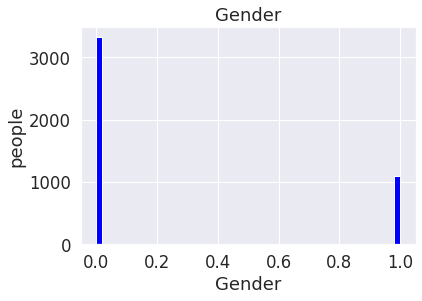

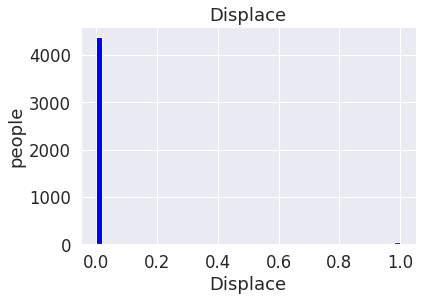

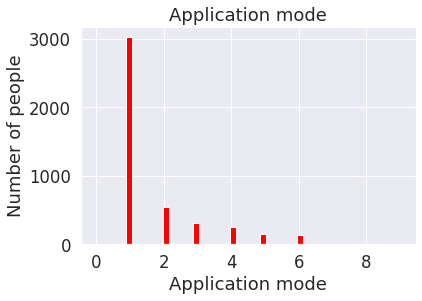

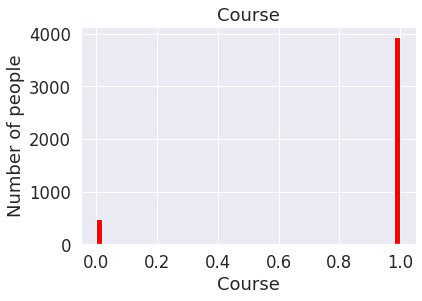

array([[<Axes: xlabel='Previous qualification (grade)', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='Admission grade', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='Curricular units 1st sem (grade)', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='Curricular units 2nd sem (grade)', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='Unemployment rate', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='Inflation rate', ylabel='Previous qualification (grade)'>,
        <Axes: xlabel='GDP', ylabel='Previous qualification (grade)'>],
       [<Axes: xlabel='Previous qualification (grade)', ylabel='Admission grade'>,
        <Axes: xlabel='Admission grade', ylabel='Admission grade'>,
        <Axes: xlabel='Curricular units 1st sem (grade)', ylabel='Admission grade'>,
        <Axes: xlabel='Curricular units 2nd sem (grade)', ylabel='Admission grade'>,
        <Axes: xlabel='Unemployment rate', ylabel='Admissio

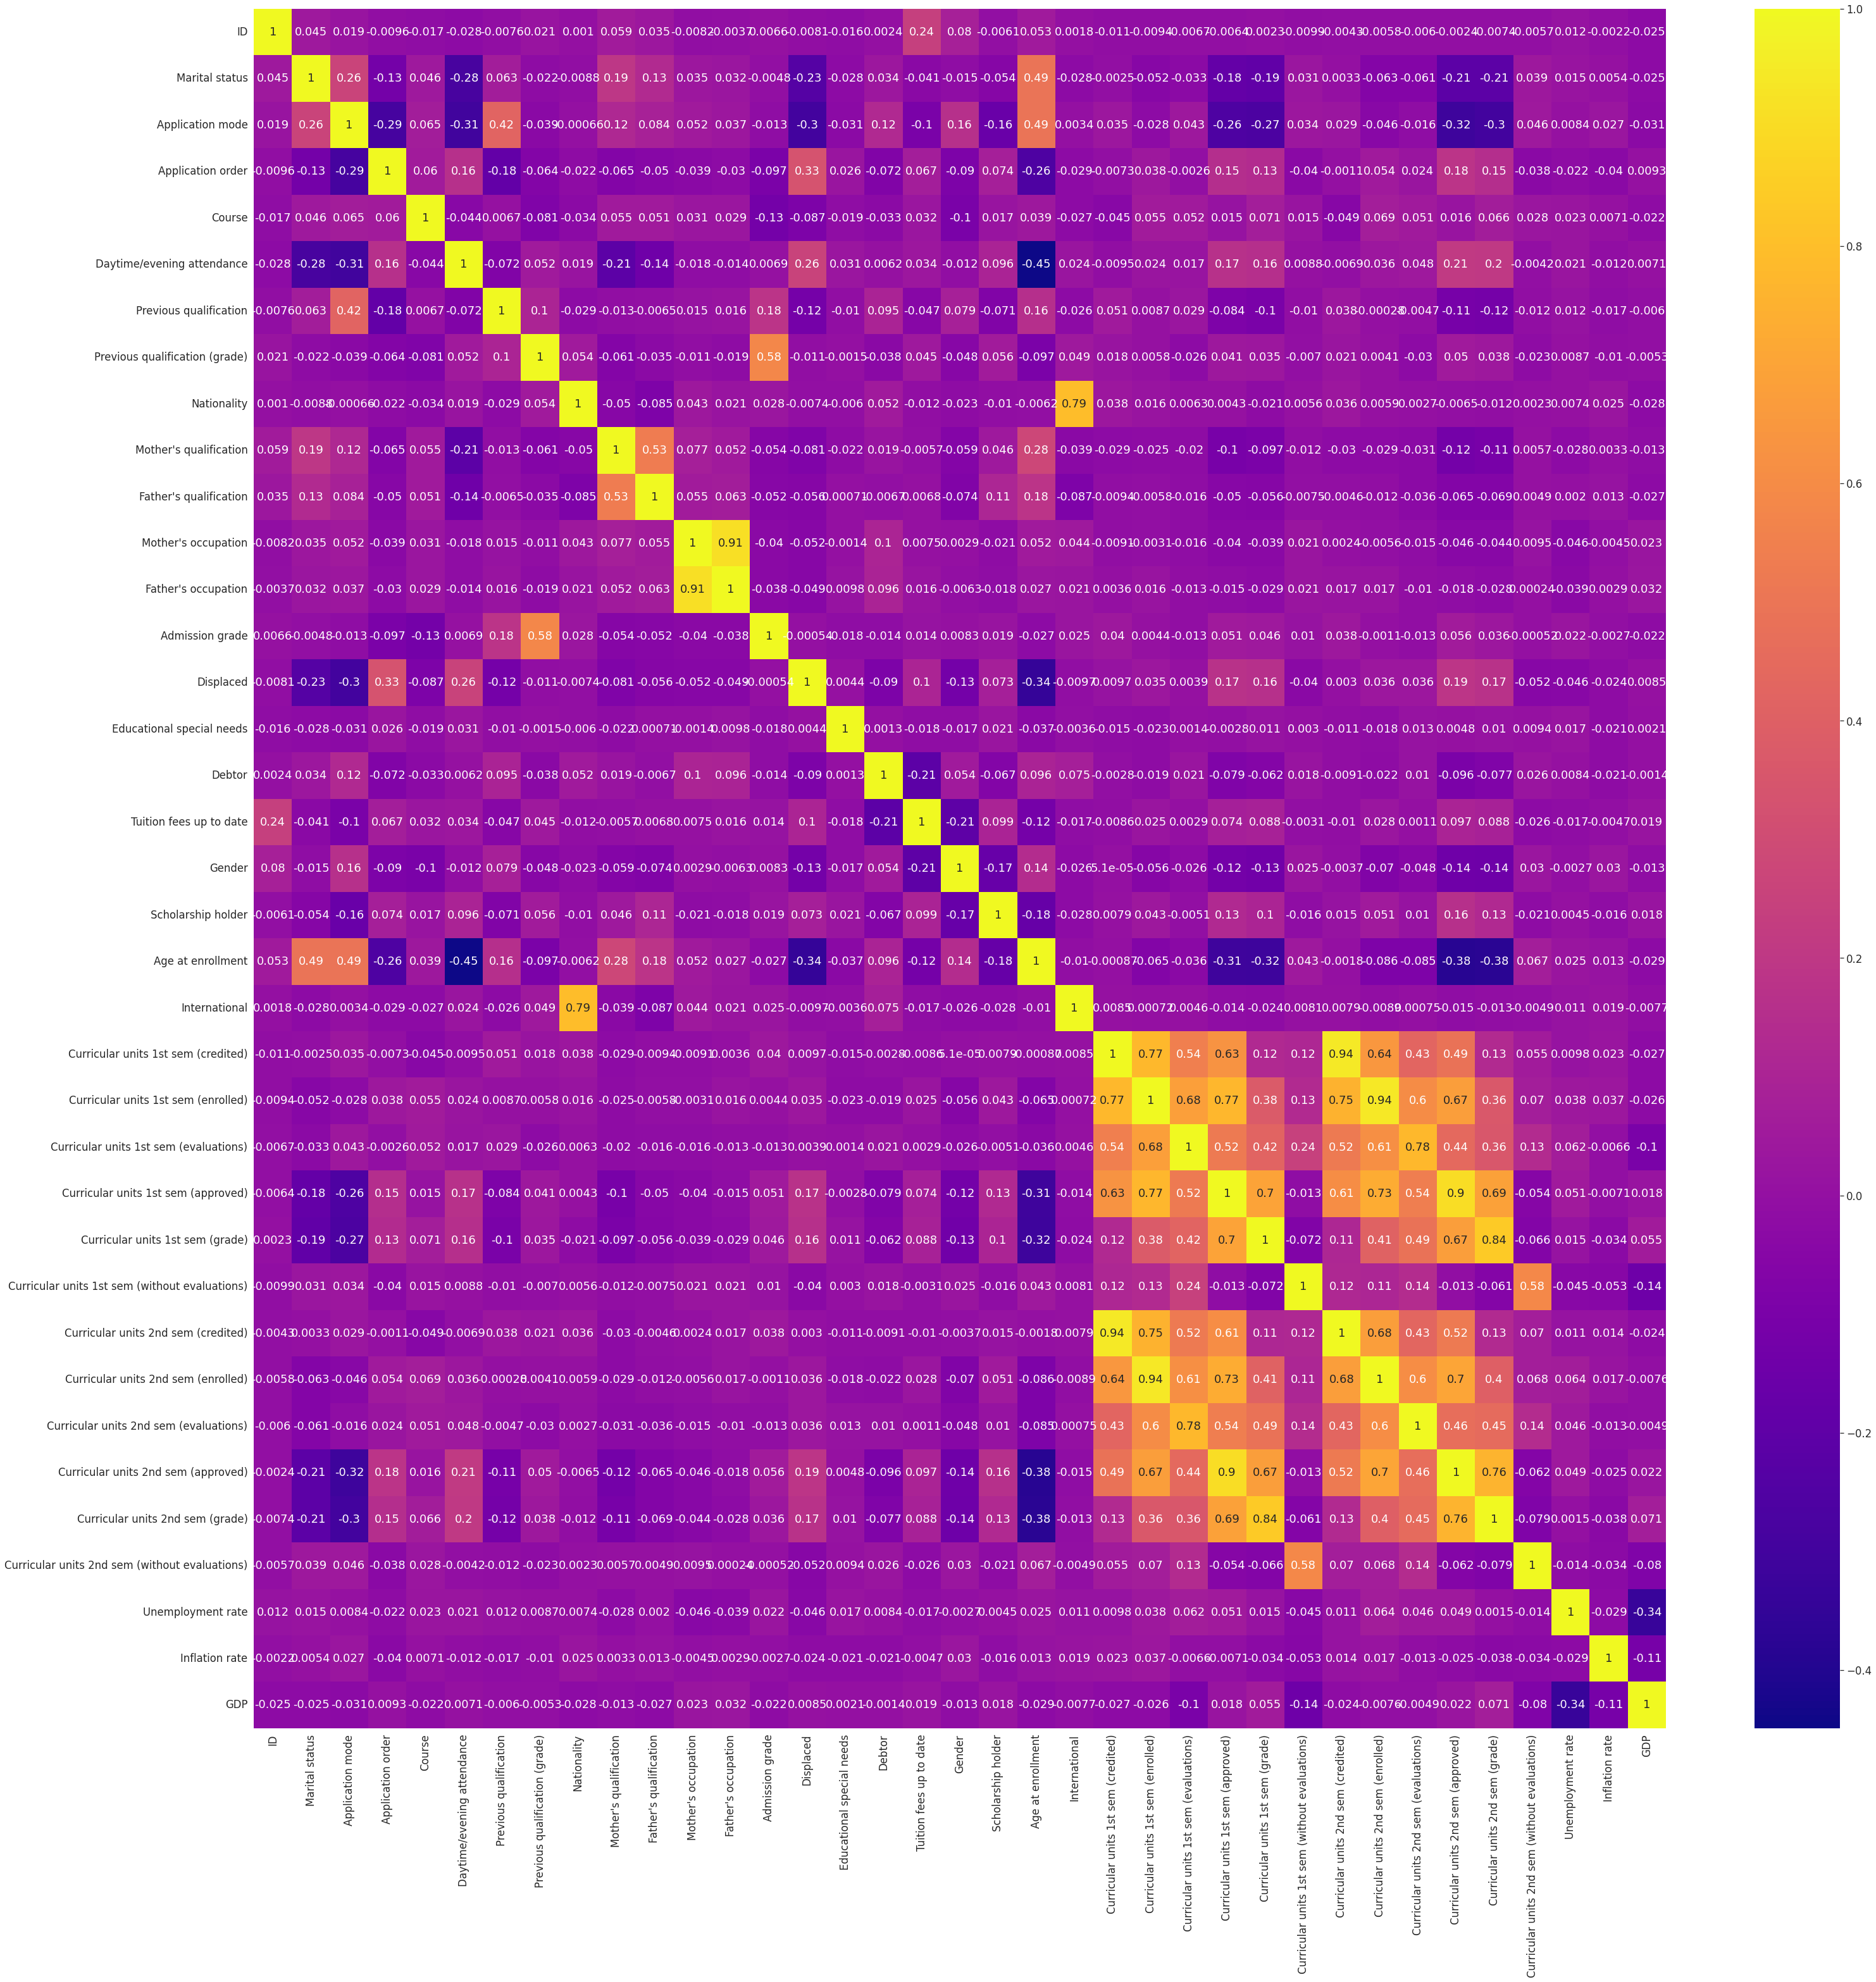

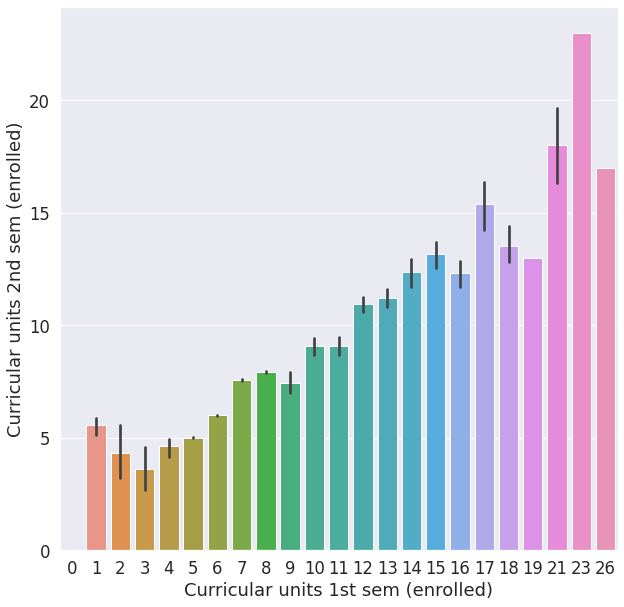

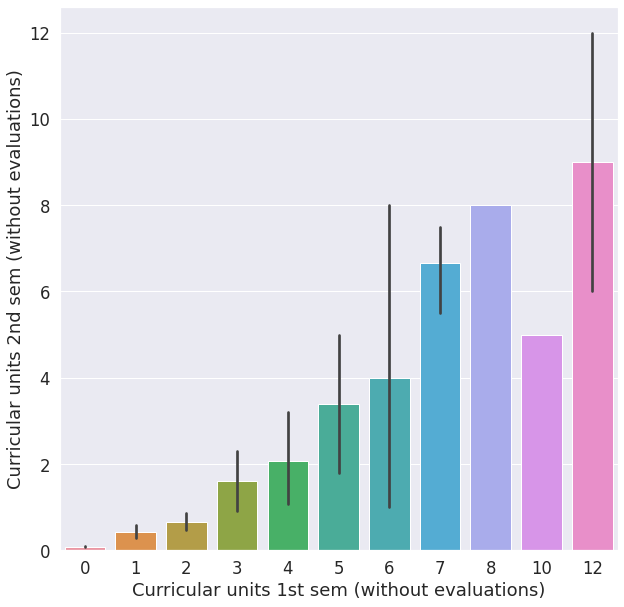

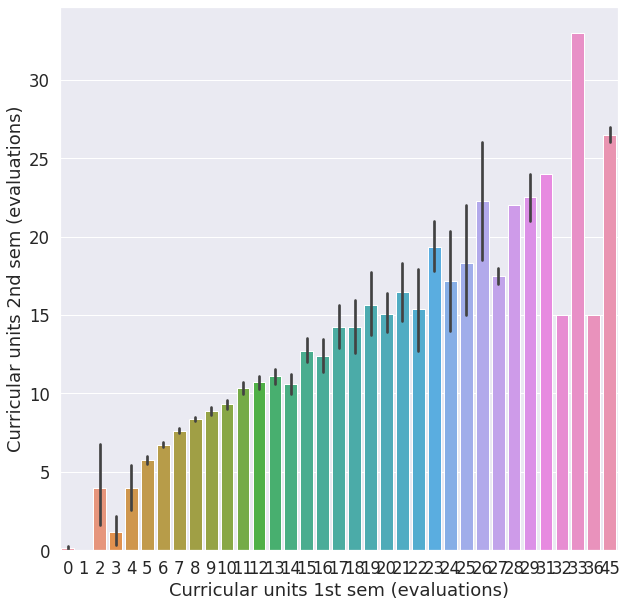

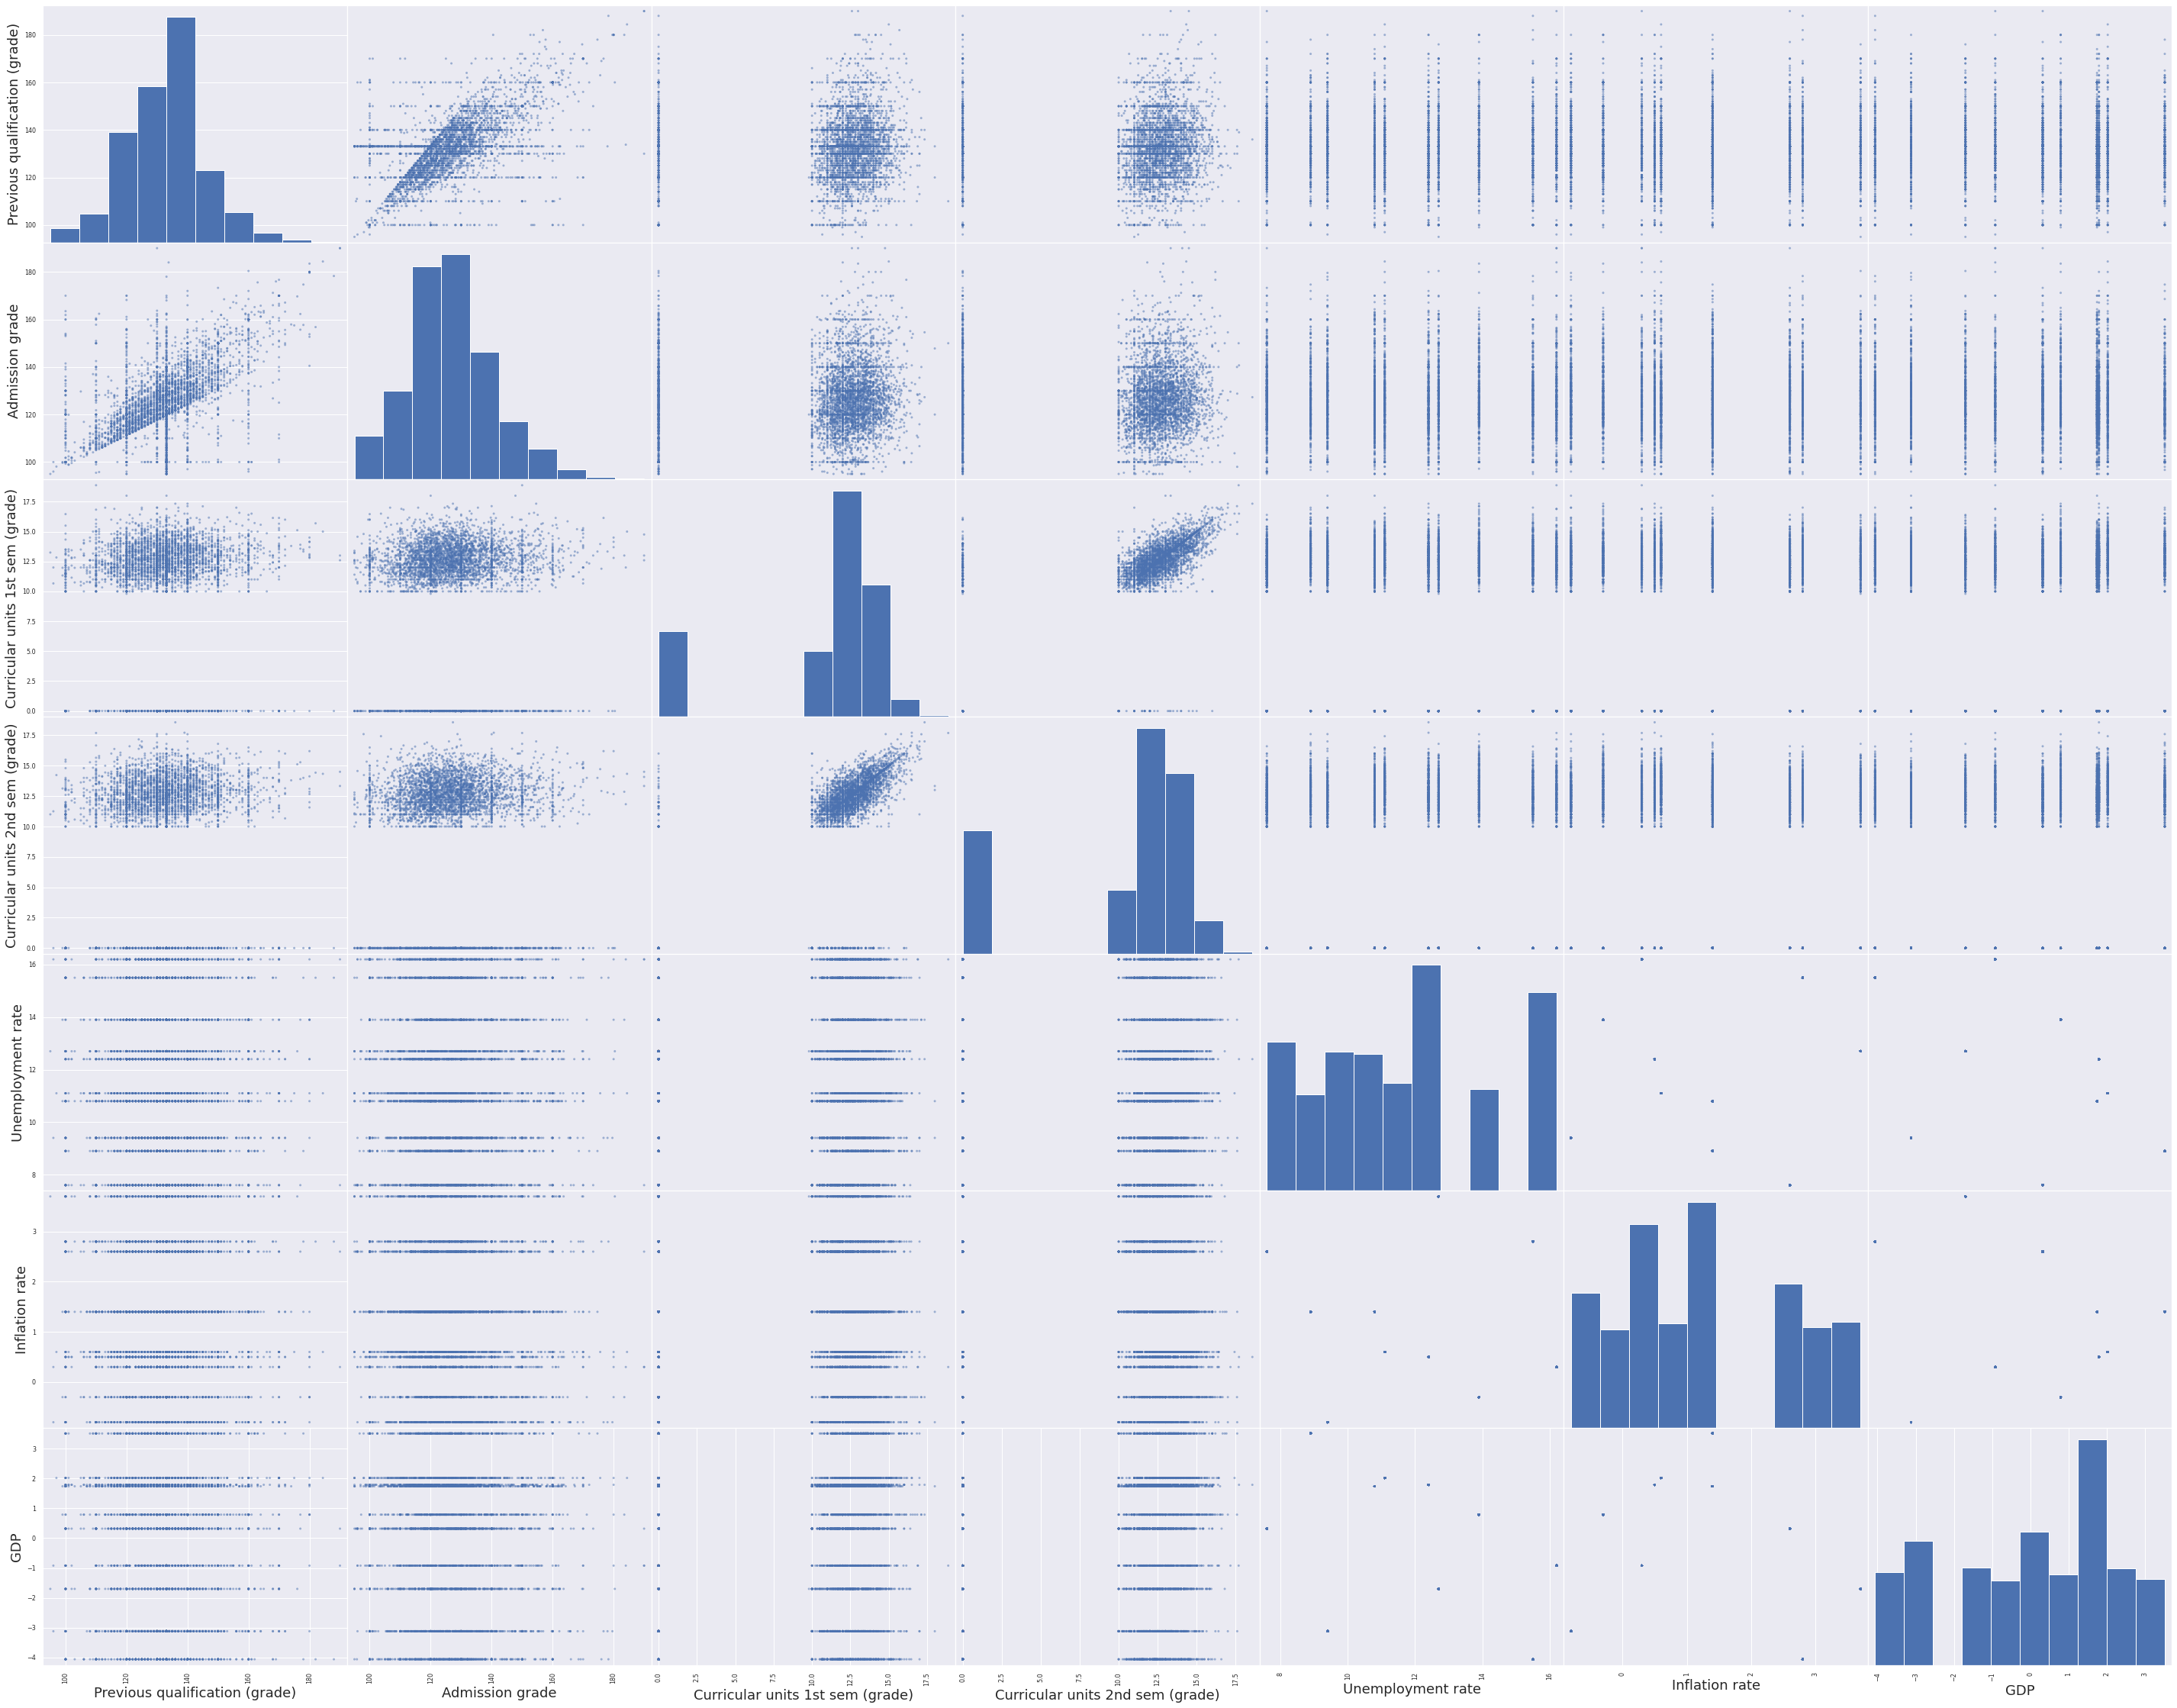

In [83]:
#assignment_2
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Theme plot
plot = plt.hist(merge2[merge2.columns[19]], bins = 50, color ='blue')

#categorical for gender
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('people')
plt.show()

#categorical for Displace
plot = plt.hist(merge2[merge2.columns[15]], bins = 50, color ='blue')
plt.title('Displace')
plt.xlabel('Displace')
plt.ylabel('people')
plt.show()

#Numerical for Application mode 
plot = plt.hist(merge2[merge2.columns[3]], bins = 50, color ='red')
plt.title('Application mode')
plt.xlabel('Application mode')
plt.ylabel('Number of people')
plt.show()

#Numerical for Course
plot = plt.hist(merge2[merge2.columns[5]], bins = 50, color ='red')
plt.title('Course')
plt.xlabel('Course')
plt.ylabel('Number of people')
plt.show()

#Correction Matrix
sns.set(style = 'white', color_codes = True)
sns.set(font_scale = 1.5)
plt.figure(figsize = (50,50))
sns.heatmap(merge2.corr(), cmap='plasma',  annot = True)

#explore the relationship of Curricular units 1st sem (credited) and  Curricular units 2nd sem (credited)
plt.figure(figsize = (10,10))
sns.barplot(data=merge2, x=merge2[merge2.columns[23]], y=merge2[merge2.columns[29]])

#explore the relationship of Curricular units 1st sem (enrolled) and  Curricular units 2nd sem (enrolled)
plt.figure(figsize = (10,10))
sns.barplot(data=merge2, x=merge2[merge2.columns[27]], y=merge2[merge2.columns[33]])

#explore the relatonship of Curricular units 1st sem (grade) and  Curricular units 2nd sem (grade)
plt.figure(figsize = (20,20))
sns.barplot(data=merge2, x=merge2[merge2.columns[24]], y=merge2[merge2.columns[30]])

#plot the scatter matrix
pd.plotting.scatter_matrix(merge2[["Previous qualification (grade)","Admission grade",
                                   "Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)",
                                   "Unemployment rate","Inflation rate","GDP"]], figsize = (50,40))
